In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("modified_diabetes_prediction_dataset.csv")

df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99999.000000,100001.000000,100001.000000,100001.000000,100000.000000,100001.000000,100001.000000
mean,41.391930,0.074849,0.039420,27.318426,5.527523,138.155888,0.084999
std,22.669181,0.263149,0.194592,6.935843,1.070676,51.279018,0.278882
min,-4.920000,0.000000,0.000000,3.629572,3.500000,80.000000,0.000000
25%,23.000000,0.000000,0.000000,23.382033,4.800000,100.000000,0.000000
50%,42.000000,0.000000,0.000000,26.964724,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,30.279663,6.200000,159.000000,0.000000
max,84.000000,1.000000,1.000000,101.665015,9.000000,9999.000000,1.000000


In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,unknown,78.0,0,1,never,101.665015,6.6,140,0
1,Female,NaN,0,0,No Info,28.034572,6.6,80,0
2,Male,28.0,0,0,NaN,25.369152,5.7,9999,0
3,Female,37.0,0,0,yes,25.262602,NaN,155,0
4,Male,75.0,1,1,current,23.212811,4.8,155,0


## Handling missing data, Duplicates and outlires

gender                 0
age                    2
hypertension           0
heart_disease          0
smoking_history        1
bmi                    0
HbA1c_level            1
blood_glucose_level    0
diabetes               0
dtype: int64
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
                age  hypertension  heart_disease           bmi   HbA1c_level  \
count  98056.000000  98056.000000   98056.000000  98056.000000  98056.000000   
mean      42.243395      0.076334       0.040191     27.491142      5.530531   
std       22.061347      0.265533       0.196409      6.860373      1.072203   
min        0.080000      0.000000       0.000000      6.193520      3.500000   
25%       24.000000      0.000000       0.000000     23.630255      4.800000   
50%       43.000000      0.000000       0.00

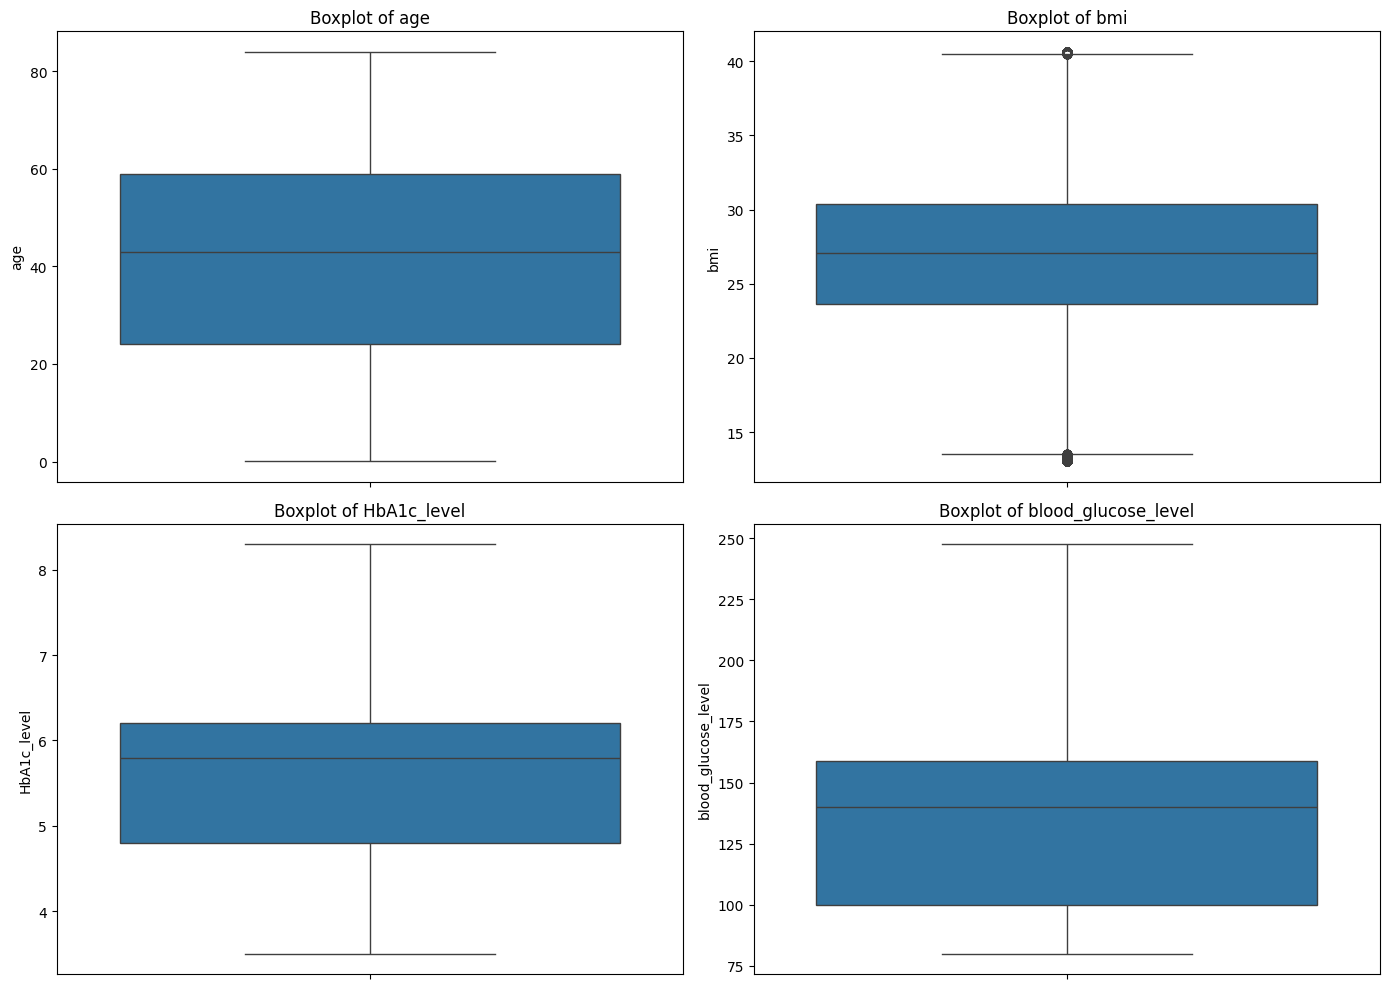

In [5]:
print(df.isnull().sum())
df = df.dropna()
df = df[df["age"] > 0]
print(df.isnull().sum())
print(df.describe())

# IQR method for handling outlires:
df["bmi"] = df["bmi"].clip(lower=13.04, upper=40.63)
df["HbA1c_level"] = df["HbA1c_level"].clip(lower=2.7, upper=8.3)
df["blood_glucose_level"] = df["blood_glucose_level"].clip(lower=11.5, upper=247.5)

# duplicates
df = df.drop_duplicates()


# visulazation
plt.figure(figsize=(14, 10))

for i, col in enumerate(["age", "bmi", "HbA1c_level", "blood_glucose_level"], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel("")

plt.tight_layout()
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn import svm
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize


# encoding non-numeric values
label_encoder = preprocessing.LabelEncoder()
df.loc[:, 'gender'] = label_encoder.fit_transform(df['gender'])
df.loc[:, 'smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

In [7]:


x = df.drop("diabetes", axis=1)
y = df["diabetes"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [8]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,3,78.0,0,1,4,40.630000,6.6,140.0,0
4,1,75.0,1,1,1,23.212811,4.8,155.0,0
5,0,16.0,0,0,4,28.156373,6.6,85.0,0
6,0,46.0,0,0,4,16.546449,6.5,200.0,1
7,0,82.0,0,0,0,25.621355,5.7,85.0,0


In [9]:
clf_dt = DecisionTreeClassifier(max_depth=4)
clf_dt = clf_dt.fit(x_train, y_train)

predictions = clf_dt.predict(x_test)

print("Decistion Tree Accuracy: ", accuracy_score(y_test, predictions))
print("Decision Tree Cunfusion matrix: ", confusion_matrix(y_test, predictions, labels=[0, 1]))
print("Decision Tree Precion: ", precision_score(y_test, predictions, labels=[0, 1]))
print("Decision Tree Recall: ", recall_score(y_test, predictions, labels=[0, 1]))
F1 = 2*((precision_score(y_test, predictions, labels=[0, 1])*recall_score(y_test, predictions, labels=[0, 1]))/(precision_score(y_test, predictions, labels=[0, 1])+recall_score(y_test, predictions, labels=[0, 1])))
print("Decision Tree F1: ", F1)

Decistion Tree Accuracy:  0.9715889758421232
Decision Tree Cunfusion matrix:  [[26881     0]
 [  835  1674]]
Decision Tree Precion:  1.0
Decision Tree Recall:  0.667198086887206
Decision Tree F1:  0.8003825005976571


In [10]:
clf_svc = svm.SVC(kernel="rbf")
clf_svc.fit(x_train, y_train)

predictions = clf_svc.predict(x_test)

print("Support vector machine Classifier Accuracy: ", accuracy_score(y_test, predictions))
print("support vector machine Cunfusion matrix: ", confusion_matrix(y_test, predictions, labels=[0, 1]))
print("Support vector machine Precion: ", precision_score(y_test, predictions, labels=[0, 1]))
print("Support vector machine Recall: ", recall_score(y_test, predictions, labels=[0, 1]))
F1 = 2*((precision_score(y_test, predictions, labels=[0, 1])*recall_score(y_test, predictions, labels=[0, 1]))/(precision_score(y_test, predictions, labels=[0, 1])+recall_score(y_test, predictions, labels=[0, 1])))
print("Support vector machine F1: ", F1)

Support vector machine Classifier Accuracy:  0.9477713507995917
support vector machine Cunfusion matrix:  [[26881     0]
 [ 1535   974]]
Support vector machine Precion:  1.0
Support vector machine Recall:  0.3882024711040255
Support vector machine F1:  0.5592879701406833


In [12]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,97964.000000,97964.000000,97964.000000,97964.000000,97964.000000,97964.000000,97964.000000
mean,42.247768,0.076385,0.040229,27.237138,5.522478,137.484704,0.086675
std,22.063446,0.265615,0.196497,6.085395,1.048867,38.580689,0.281359
min,0.080000,0.000000,0.000000,13.040000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.629619,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.053562,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,30.372020,6.200000,159.000000,0.000000
max,84.000000,1.000000,1.000000,40.630000,8.300000,247.500000,1.000000


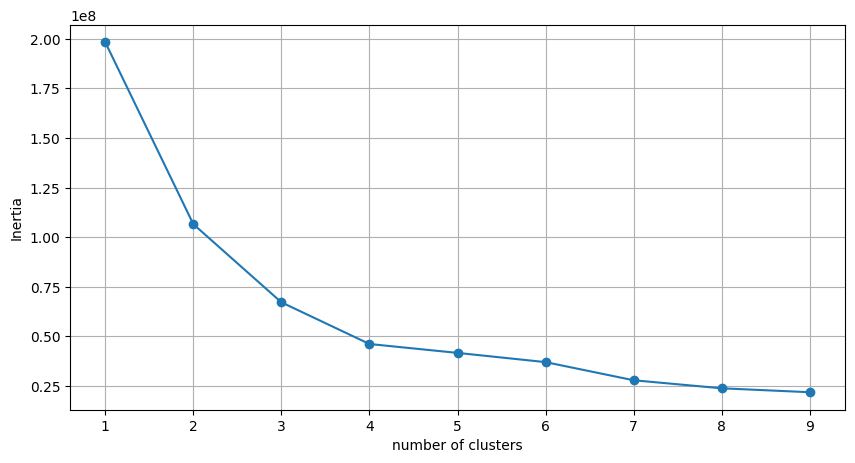

In [13]:
# KNN with elbow method
scaler = StandardScaler()

featurs = ["age", "hypertension", "heart_disease", "bmi", "HbA1c_level", "blood_glucose_level", "diabetes"]

df[["age_T", "hypertension_T", "heart_disease_T", "bmi_T", "HbA1c_level_T", "blood_glucose_level_T", "diabetes_T"]] = scaler.fit_transform(df[featurs])

def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)

        means.append(k)
        inertias.append(kmeans.inertia_)
    
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("number of clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

transformed_data = df[["age_T", "hypertension_T", "heart_disease_T", "bmi_T", "HbA1c_level_T", "blood_glucose_level_T", "diabetes_T"]]


optimise_k_means(transformed_data, 10)

In [14]:
transformed_data.describe()

,age_T,hypertension_T,heart_disease_T,bmi_T,HbA1c_level_T,blood_glucose_level_T,diabetes_T
count,9.796400e+04,9.796400e+04,9.796400e+04,9.796400e+04,9.796400e+04,9.796400e+04,9.796400e+04
mean,-3.168154e-16,-1.508645e-17,7.166063e-17,3.861551e-16,4.351860e-17,-5.454332e-17,2.988277e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.911215e+00,-2.875803e-01,-2.047322e-01,-2.332997e+00,-1.928260e+00,-1.489994e+00,-3.080587e-01
25%,-8.270631e-01,-2.875803e-01,-2.047322e-01,-5.928190e-01,-6.888210e-01,-9.715973e-01,-3.080587e-01
50%,3.409421e-02,-2.875803e-01,-2.047322e-01,-3.016686e-02,2.645940e-01,6.519607e-02,-3.080587e-01
75%,7.592793e-01,-2.875803e-01,-2.047322e-01,5.151511e-01,6.459600e-01,5.576729e-01,-3.080587e-01
max,1.892381e+00,3.477289e+00,4.884429e+00,2.200832e+00,2.648131e+00,2.851578e+00,3.246135e+00


In [15]:
# 6 is good!

clustering_kmeans = KMeans(n_clusters=6)
#clustering_kmeans = KMeans(n_clusters=7)
clustering_kmeans.fit(transformed_data)

df['kmeans_3'] = clustering_kmeans.labels_


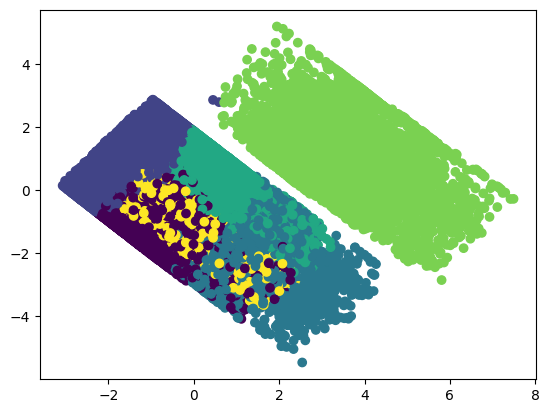

In [16]:
from sklearn.decomposition import PCA

#centroids = clustering_kmeans.cluster_centers_

pca = PCA(n_components=2)
data_2d = pca.fit_transform(transformed_data)
#centroids_2d = pca.transform(centroids.T)

plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=df['kmeans_3'])
#plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
plt.show()

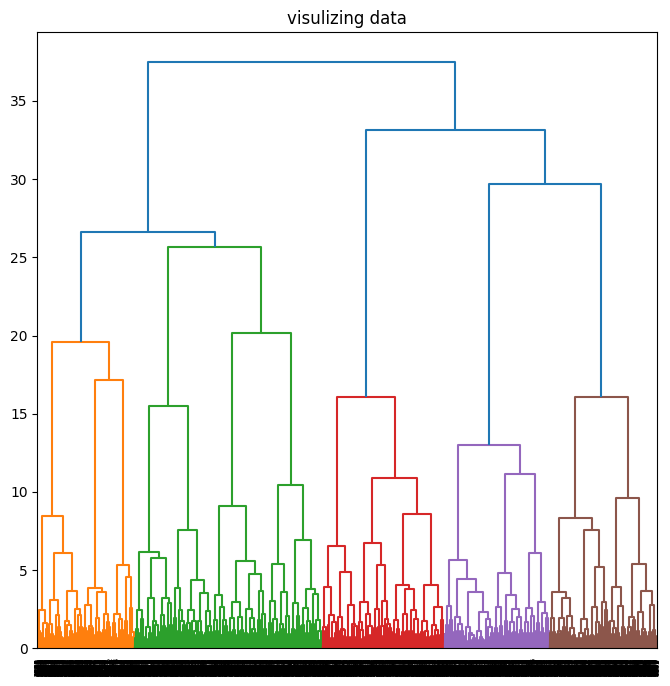

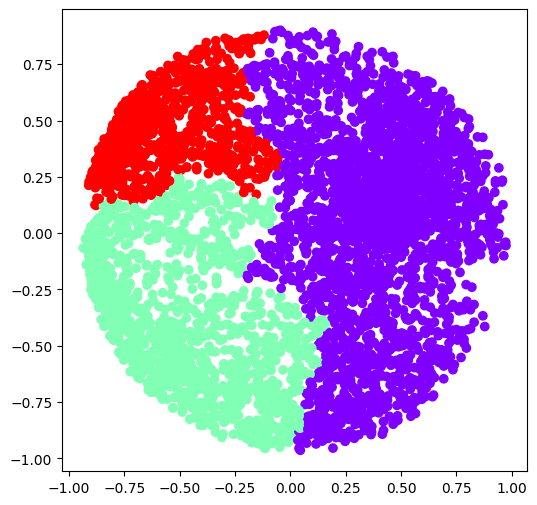

In [24]:
# import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc 


transformed_data = normalize(transformed_data)

transformed_data = pd.DataFrame(transformed_data)

pca = PCA(n_components=2)

data_2d = pca.fit_transform(transformed_data)
data_2d = pd.DataFrame(data_2d)

data_2d.columns = ['P1', 'P2']

plt.figure(figsize=(8,8))
plt.title("visulizing data")

sampled_data = transformed_data.sample(frac=0.05, random_state=42)

clustering_model_sampled = AgglomerativeClustering(n_clusters=3, linkage="ward")
sampled_clusters = clustering_model_sampled.fit_predict(sampled_data)


Dendrogram = shc.dendrogram((shc.linkage(sampled_data, method="ward")))


sample_data_2d = data_2d.sample(frac=0.05, random_state=42)

ac2 = AgglomerativeClustering(n_clusters = 3) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(sample_data_2d['P1'], sample_data_2d['P2'],  
           c = ac2.fit_predict(sample_data_2d), cmap ='rainbow') 
plt.show() 
